In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

+ ##### Download, load and clean the data. Do not forget to normalize it.

In [2]:
#load the dataset
df = pd.read_csv('train.csv')

In [3]:
#Display the 1st 5 rows
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Display the shape of the dataset
print('Our dataset contains {} rows and {} dimensions(columns)'.format(df.shape[0], df.shape[1]))

Our dataset contains 4209 rows and 378 dimensions(columns)


In [5]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


> ##### To convert the object columns into numerical, we will apply the pandas get_dummies method. Then, we will merge the two datasets, removed the duplicate features as well as one (any) of the dummy variables because we need to keep n-1 variables from the dummies.
>+ ##### We choose this method instead of just applying the LabelEncoder because we don't want our model to try to compare each values assigned to the inputs among themselves. We could apply the OneHotEncoder as well.

In [16]:
#retrieve all the object columns from the original dataset
for col in df.select_dtypes('object'):
    df1[[col]] = df[[col]]
df1.head()

,X8,X0,X1,X2,X3,X4,X5,X6
0,o,k,v,at,a,d,u,j
1,o,k,t,av,e,d,y,l
2,x,az,w,n,c,d,x,j
3,e,az,t,n,f,d,x,l
4,n,az,v,n,f,d,h,d


In [17]:
#create dummy variables from the caterogies of the columns of df1
dummies = pd.get_dummies(df1)

In [18]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 195 entries, X8_a to X6_l
dtypes: uint8(195)
memory usage: 801.6 KB


In [19]:
#merge the dummy DF with our original dataset
merged_df = pd.concat([df, dummies], axis=1)

In [20]:
merged_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,0,1,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,0,1
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,1,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,1
4,13,78.02,az,v,n,f,d,h,d,n,...,0,1,0,0,0,0,0,0,0,0


In [21]:
#delete the columns of type object since we have created dummy variables for them
merged_df = merged_df.drop(merged_df.select_dtypes('object'), axis=1)

In [22]:
merged_df.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13,78.02,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
#drop one of the dummy columns because we should end up with n-1 dummy variables as well as the ID column
final_df = merged_df.drop(['X6_c','ID'], axis=1)
#Display the shape of our final dataset
print('Our final dataset contains {} rows and {} dimensions(columns)'\
      .format(final_df.shape[0], final_df.shape[1]))

Our final dataset contains 4209 rows and 563 dimensions(columns)


+ ##### Perform a principle component analysis (PCA). How many components will you choose based on an explained variance ratio of your choice? Plot the proportion of explained variance and the number of components.
> ##### Objective: Find the number of components for which we obtain a proportion of 96% of variance.

In [24]:
#Get the target variable from the features
X = final_df.drop('y', axis=1)
y = final_df[['y']]

In [25]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [26]:
#Import PCA
from sklearn.decomposition import PCA

In [27]:
#We start by training our model on the same number of dimensions we have in X instead of visualizing it on 2D or 3D.
model = PCA(n_components=562)
X_reduced = model.fit_transform(X_std)

Text(0.5, 1.04, 'Variance of PCA features')

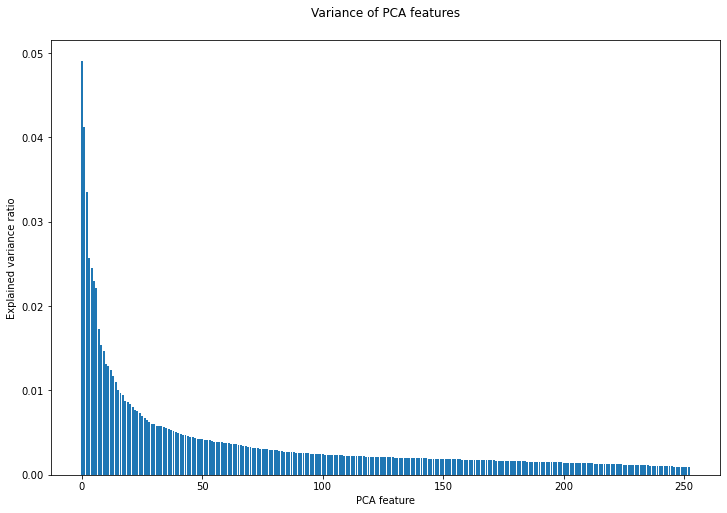

In [115]:
features = range(model.n_components_)

#Display bar plot of the components and their variance to have a quick idea of the # of PC to keep
plt.figure(figsize=(12,8))
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Explained variance ratio')
plt.title('Variance of PCA features', y=1.04)

In [29]:
#Exact number of components to reach 96% of variance by performing the cummulative sum of all the variances
val = np.argmax(np.cumsum(model.explained_variance_ratio_) > .96)
print(f'We reach 96% from the {val}rd component')

We reach 96% from the 253rd component


Text(0, 0.5, '% of variance')

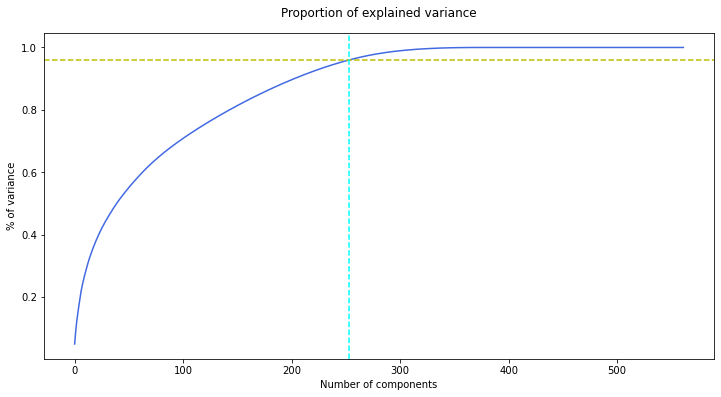

In [30]:
#Plot the graph of when we obtain the proportion of variance we wanted(96%)
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(model.explained_variance_ratio_), color='RoyalBlue')
plt.axhline(y=0.96, color='y', linestyle='--')
plt.axvline(x = 253, color='cyan', linestyle='--')
# plt.text(10, 0.91, '96%', color = 'b', fontsize=12)
plt.title('Proportion of explained variance', y=1.03)
plt.xlabel('Number of components')
plt.ylabel('% of variance')

In [109]:
#We can then re-run our model using 253 components
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=253))])
pc = pipe.fit_transform(X_std)

In [117]:
print('{} components.'.format(pipe.steps[1][1].n_components_))

253 components.


+ ##### One downside of PCA is that it maps all the original features to a lower dimensional space, resulting in less interpretable features. Let’s say we want to use the result of the PCA but still work with the original features. Here is what we can do. Using the selected number of components from 2), find which features of the original data have the highest absolute correlation with each of the components. Select features with absolute correlation with the PCA components of at least 0,75. How many and which features will you end up with?

In [245]:
#convert the new array into a DF
columns = ['PC_%i' % i for i in range(253)]
pc_df = pd.DataFrame(pc, columns=columns)

In [246]:
pc_df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_243,PC_244,PC_245,PC_246,PC_247,PC_248,PC_249,PC_250,PC_251,PC_252
0,13.178235,-2.701650,-1.473871,2.298407,1.658196,-8.590656,9.856701,-4.463190,-26.734928,8.128503,...,-0.235414,-0.155678,-0.021784,0.177853,0.004575,-0.052123,-0.211145,0.060444,0.228466,-0.037065
1,0.166043,0.470456,0.716077,2.228318,-2.230494,-1.649073,1.559191,-0.612329,-3.078204,1.585959,...,1.182305,-1.452922,0.361608,1.080072,-1.094899,-0.088042,0.964659,-0.244409,-0.243824,-0.628292
2,10.080163,23.134569,-5.701540,-5.303957,-0.934827,1.110191,1.451278,3.714965,-1.223728,-1.279625,...,-0.937385,-1.871889,-0.107183,4.307087,3.462463,-3.986766,-5.589417,-4.687481,-3.529240,3.563224
3,7.233057,23.755410,-6.369156,-1.363840,1.924967,1.246346,1.295576,0.559722,-0.460506,-2.458176,...,-0.630333,0.453394,-1.088201,-0.780558,-0.345048,1.130454,0.804565,0.099678,0.621702,-0.088517
4,6.615603,23.653795,-6.847704,-0.474301,2.374627,1.117700,-0.458130,0.272162,1.122620,-1.303444,...,0.837391,0.180735,0.907995,-1.508863,-1.387341,1.587590,2.816563,2.089599,1.580032,-1.242358


In [247]:
#shape of pc_df
pc_df.shape

(4209, 253)

In [248]:
#convert X_std into a DF and print its shape
data_X = pd.DataFrame(X_std)
data_X.shape

(4209, 562)

In [249]:
#concate the 2 dataframes on their column axis
ds = pd.concat([pc_df, data_X], axis=1)
cor_matrix = ds.corr().abs()

In [250]:
#only use the values on the upper triangle not to have duplicated data
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

      PC_0          PC_1          PC_2          PC_3          PC_4  \
PC_0   NaN  5.279015e-17  1.118639e-17  1.682878e-17  3.191777e-17   
PC_1   NaN           NaN  2.479480e-16  2.283709e-17  1.246425e-16   
PC_2   NaN           NaN           NaN  3.144621e-16  5.360980e-16   
PC_3   NaN           NaN           NaN           NaN  5.046882e-16   
PC_4   NaN           NaN           NaN           NaN           NaN   
...    ...           ...           ...           ...           ...   
557    NaN           NaN           NaN           NaN           NaN   
558    NaN           NaN           NaN           NaN           NaN   
559    NaN           NaN           NaN           NaN           NaN   
560    NaN           NaN           NaN           NaN           NaN   
561    NaN           NaN           NaN           NaN           NaN   

              PC_5          PC_6          PC_7          PC_8          PC_9  \
PC_0  2.314455e-17  2.153607e-17  2.861355e-18  1.204248e-16  2.255523e-16   
PC_

In [254]:
#returns the index of the columns that have an absolute correlation of at least 0.75
[column for column in upper_tri.columns if any(upper_tri[column] >= 0.75)]

[18,
 24,
 26,
 28,
 37,
 43,
 49,
 50,
 55,
 63,
 64,
 68,
 72,
 77,
 78,
 82,
 86,
 87,
 89,
 90,
 99,
 101,
 106,
 107,
 108,
 109,
 113,
 115,
 116,
 117,
 119,
 121,
 123,
 124,
 127,
 133,
 134,
 135,
 136,
 143,
 144,
 147,
 148,
 152,
 156,
 157,
 158,
 164,
 165,
 169,
 172,
 173,
 176,
 178,
 182,
 183,
 184,
 186,
 189,
 192,
 193,
 197,
 198,
 199,
 200,
 201,
 203,
 206,
 208,
 210,
 211,
 213,
 216,
 222,
 223,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 256,
 258,
 259,
 260,
 261,
 263,
 266,
 278,
 280,
 283,
 286,
 287,
 291,
 294,
 295,
 297,
 300,
 303,
 304,
 307,
 308,
 309,
 311,
 320,
 329,
 331,
 332,
 335,
 339,
 340,
 341,
 343,
 345,
 346,
 347,
 348,
 350,
 351,
 353,
 354,
 356,
 357,
 359,
 360,
 361,
 362,
 364,
 367,
 393,
 394,
 405,
 413,
 416,
 440,
 441,
 443,
 444,
 450,
 453,
 460,
 465,
 467,
 469,
 470,
 472,
 474,
 475,
 477,
 479,
 480,
 481,
 483,
 484,
 485,
 487,
 